In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [154]:
df=pd.read_csv("Mobile_data.csv")

In [155]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,Price
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,0
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,1
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,1
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  Price          2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [157]:
df.duplicated().sum()

np.int64(0)

In [158]:
for i in df.columns:
    print(i,"--->",df[i].nunique())

battery_power ---> 1094
clock_speed ---> 26
fc ---> 20
int_memory ---> 63
m_dep ---> 10
mobile_wt ---> 121
n_cores ---> 8
pc ---> 21
px_height ---> 1137
px_width ---> 1109
ram ---> 1562
sc_h ---> 15
sc_w ---> 19
talk_time ---> 19
Price ---> 2


In [159]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,Price
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.500125
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,0.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000


In [160]:
print("Median:",df["px_height"].median())
df["px_height"].describe()

Median: 564.0


count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

In [161]:
df["px_height"].quantile(0.1)

np.float64(125.9)

In [162]:
df["px_height"]=np.where(df["px_height"]==0,125,df["px_height"])

In [163]:
df["px_height"].describe()

count    2000.000000
mean      645.233000
std       443.616577
min         1.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

In [164]:
print("Median:",df["px_width"].median())
df["px_width"].describe()


Median: 1247.0


count    2000.000000
mean     1251.515500
std       432.199447
min       500.000000
25%       874.750000
50%      1247.000000
75%      1633.000000
max      1998.000000
Name: px_width, dtype: float64

In [165]:
print("Median:",df["sc_w"].median())
df["sc_w"].describe()

Median: 5.0


count    2000.000000
mean        5.767000
std         4.356398
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

In [166]:
df["sc_w"]=np.where(df["sc_w"]==0,2,df["sc_w"])

In [167]:
df["sc_w"].describe()

count    2000.00000
mean        5.94700
std         4.15076
min         1.00000
25%         2.00000
50%         5.00000
75%         9.00000
max        18.00000
Name: sc_w, dtype: float64

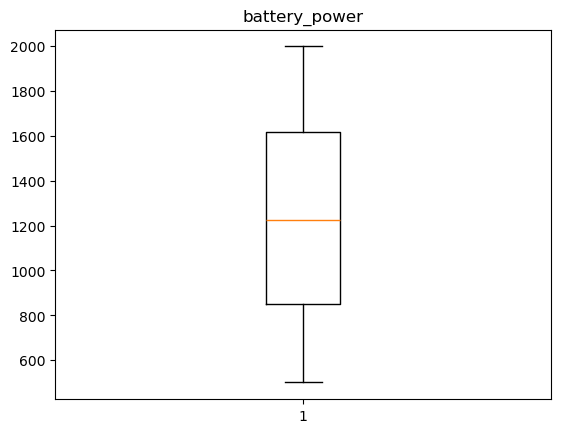

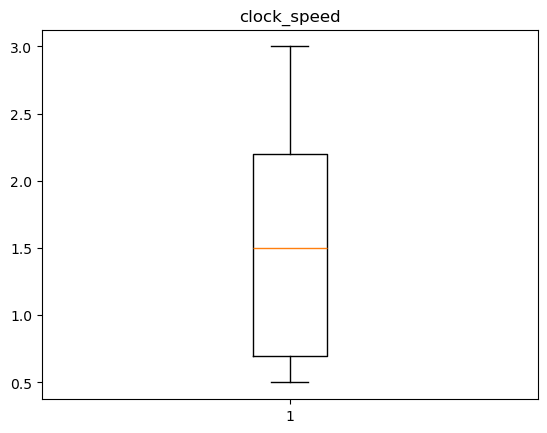

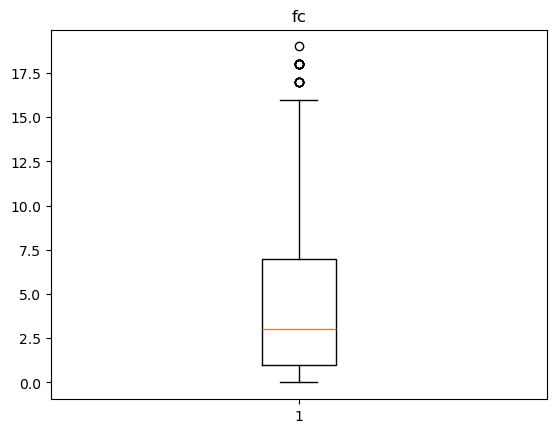

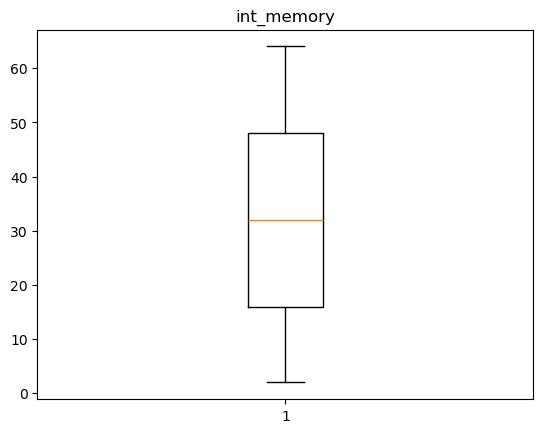

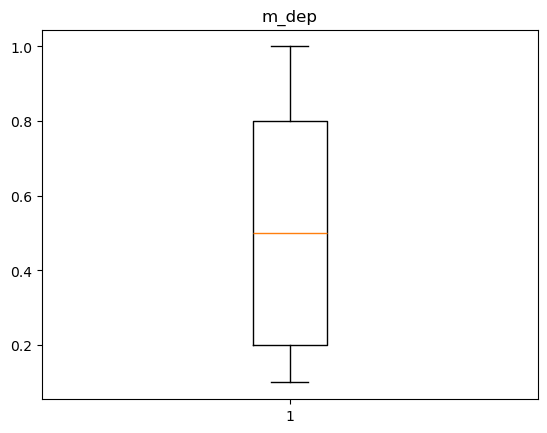

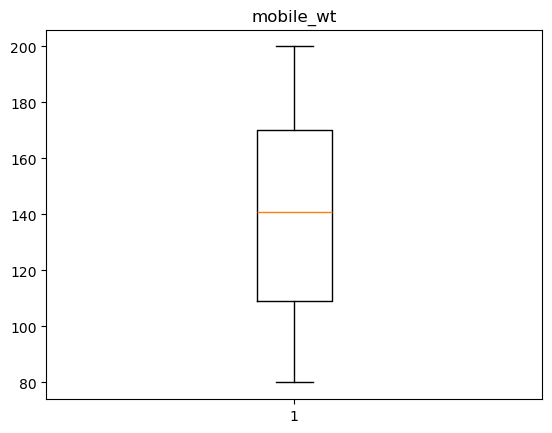

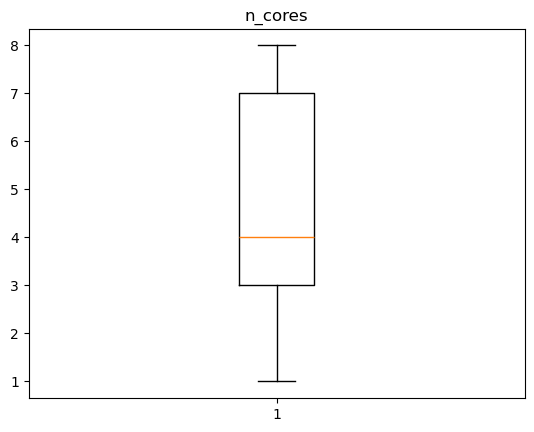

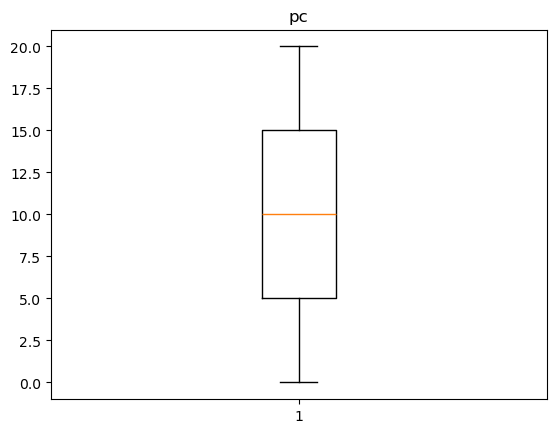

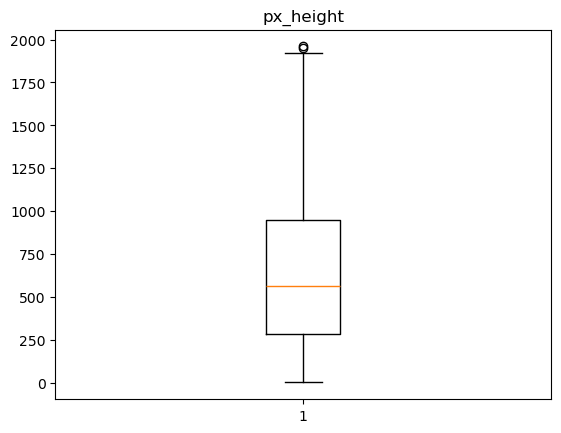

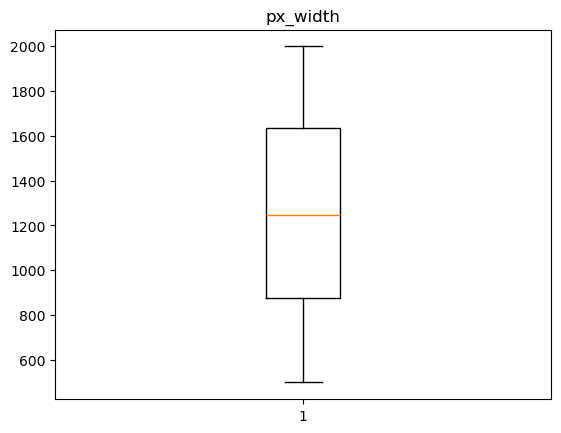

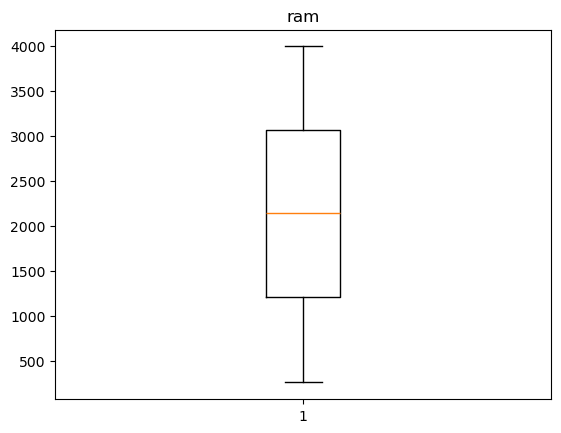

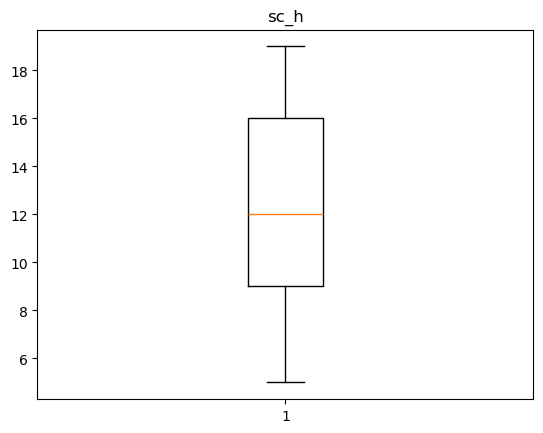

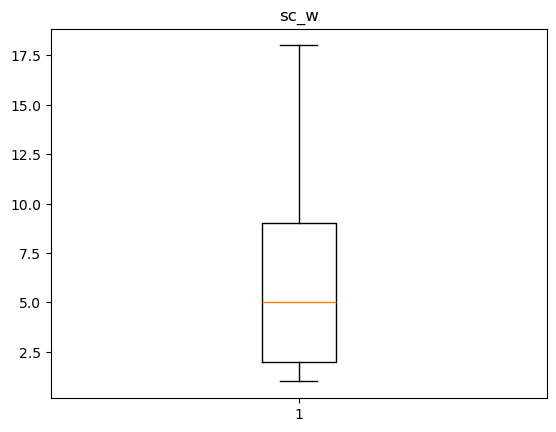

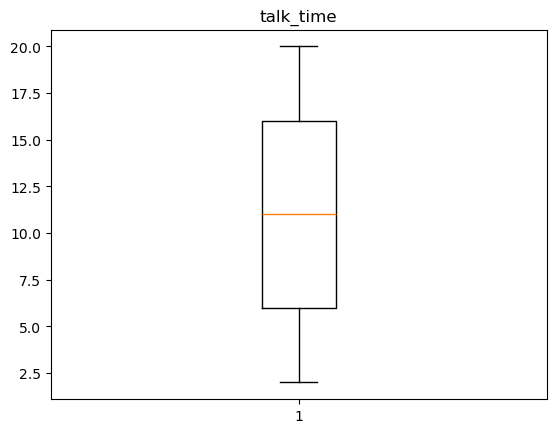

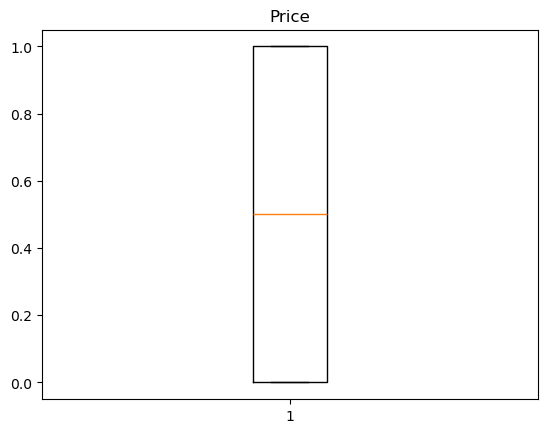

In [168]:
for i in df.select_dtypes([float,int]).columns:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [169]:
for i in df[["fc","px_height"]].columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lf=q1-(1.5*iqr)
    uf=q3+(1.5*iqr)
    df[i]=np.where(df[i]>uf,uf,df[i])

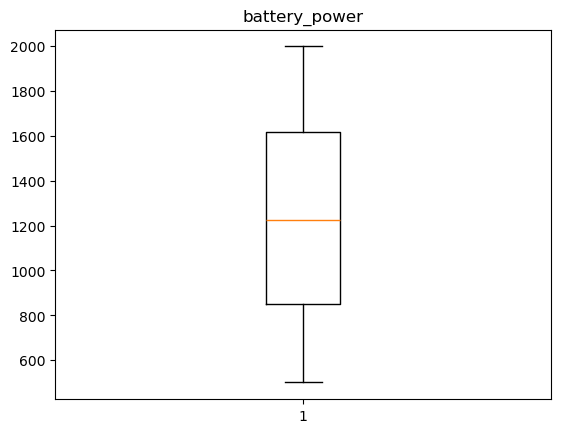

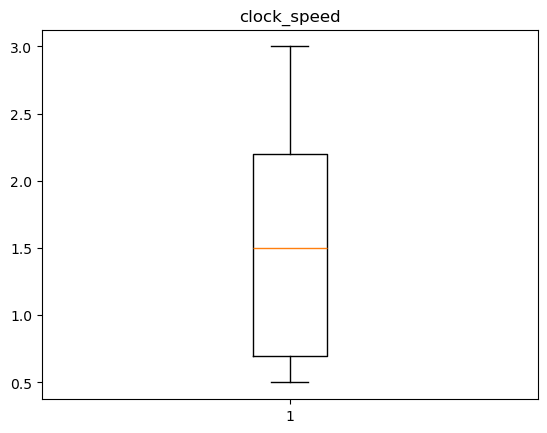

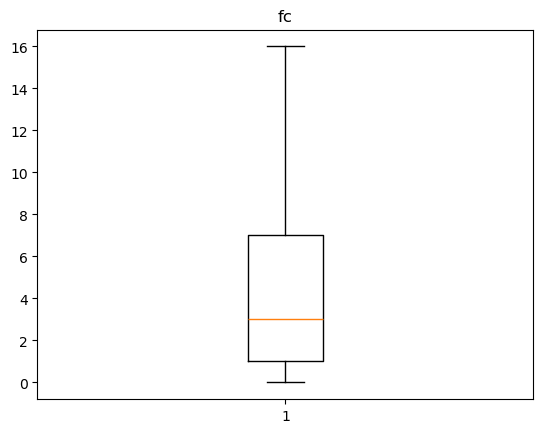

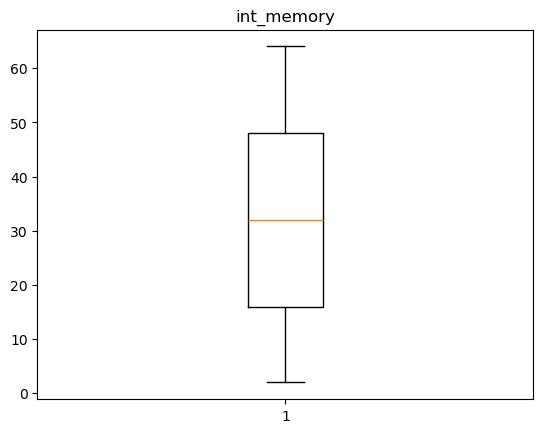

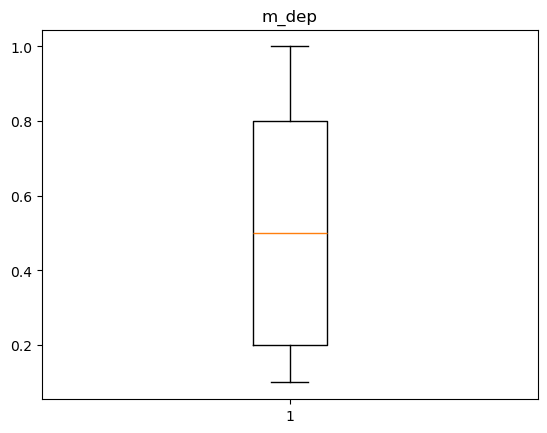

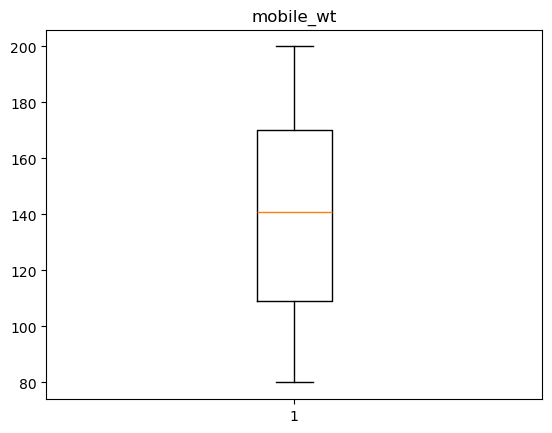

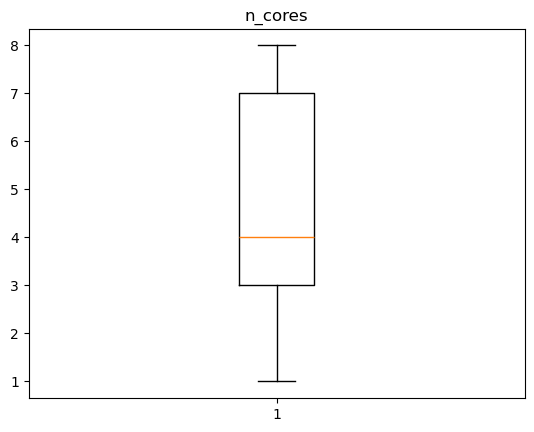

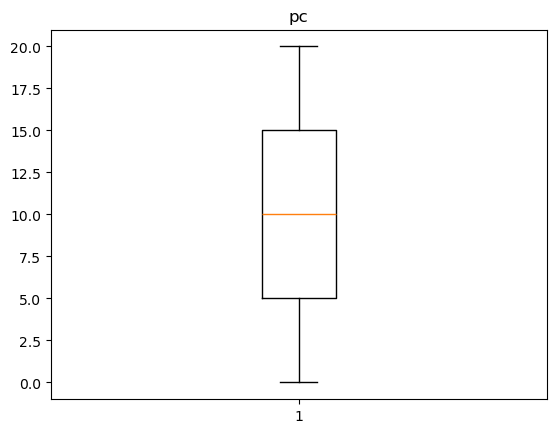

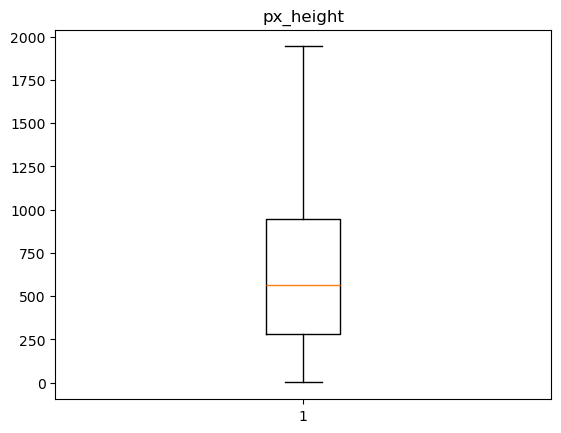

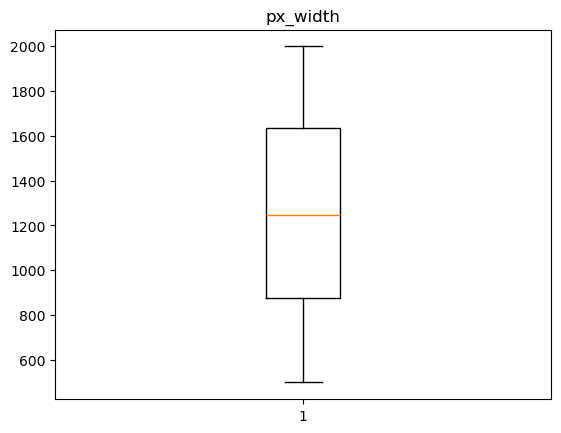

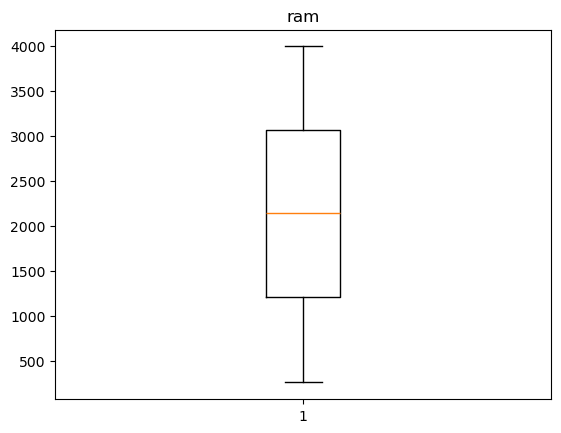

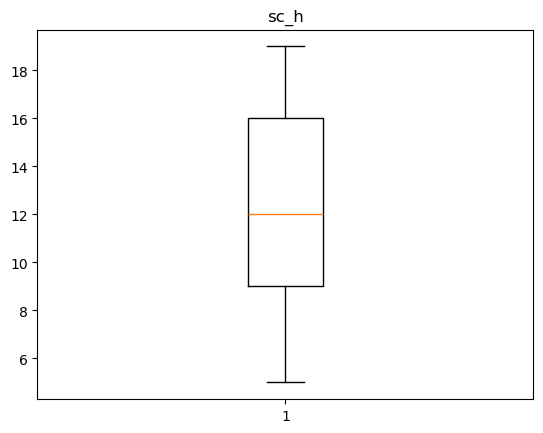

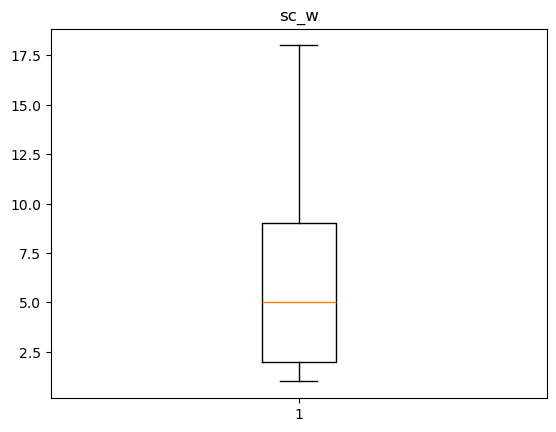

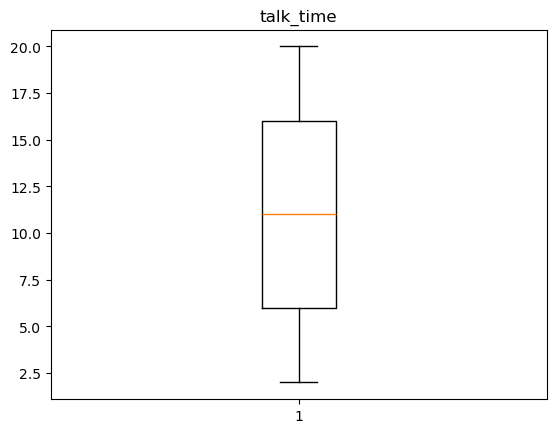

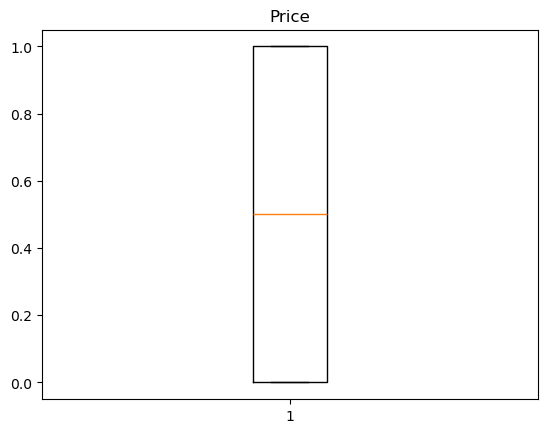

In [170]:
for i in df.select_dtypes([float,int]).columns:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [171]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,Price
0,842,2.2,1.0,7,0.6,188,2,2,20.0,756,2549,9,7,19,0
1,1021,0.5,0.0,53,0.7,136,3,6,905.0,1988,2631,17,3,7,1
2,563,0.5,2.0,41,0.9,145,5,6,1263.0,1716,2603,11,2,9,1
3,615,2.5,0.0,10,0.8,131,6,9,1216.0,1786,2769,16,8,11,1
4,1821,1.2,13.0,44,0.6,141,2,14,1208.0,1212,1411,8,2,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0.0,2,0.8,106,6,14,1222.0,1890,668,13,4,19,0
1996,1965,2.6,0.0,39,0.2,187,4,3,915.0,1965,2032,11,10,16,1
1997,1911,0.9,1.0,36,0.7,108,8,3,868.0,1632,3057,9,1,5,1
1998,1512,0.9,4.0,46,0.1,145,5,5,336.0,670,869,18,10,19,0


In [172]:
x=df.drop(columns="Price")
y=df["Price"]

In [173]:
y.value_counts()

Price
0    1000
1    1000
Name: count, dtype: int64

In [174]:
x_train, x_test, y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=88)

In [175]:
y_train.value_counts()

Price
1    800
0    800
Name: count, dtype: int64

In [176]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()


In [177]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [178]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()

In [179]:
import warnings
warnings.filterwarnings("ignore")

In [180]:
log.fit(x_train,y_train)
print("Train",log.score(x_train, y_train))
print("Test",log.score(x_test, y_test))

Train 0.8975
Test 0.8725


In [181]:
dt=DecisionTreeClassifier(max_depth=9,min_samples_split=200,random_state=88)
dt.fit(x_train,y_train)
print("Train",dt.score(x_train, y_train))
print("Test",dt.score(x_test, y_test))

Train 0.918125
Test 0.9025


In [182]:
from sklearn.model_selection import GridSearchCV


In [183]:
para={"criterion":["gini","entropy"],
     "max_depth":[2,4,6,8,10],
     "min_samples_split":[20,40,60,80,100,120,140]}
dt=DecisionTreeClassifier(random_state=88)
gc=GridSearchCV(dt,param_grid=para,n_jobs=-1, verbose=1)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 70 candidates, totalling 350 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=88), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [20, 40, 60, 80, 100, 120, 140]},
             verbose=1)

In [184]:
rm=RandomForestClassifier(n_estimators=150,
                          max_depth=10, min_samples_split=50,
                          random_state=88)

rm.fit(x_train,y_train)
print("Train",rm.score(x_train, y_train))
print("Test",rm.score(x_test, y_test))

Train 0.965625
Test 0.93


In [185]:
from sklearn.neighbors import KNeighborsClassifier

In [186]:
knn=KNeighborsClassifier(n_neighbors=7)

In [187]:
for i in range(3,20,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    print("n_neighbors",i)
    print("Train",knn.score(x_train,y_train))
    print("Test",knn.score(x_test,y_test))
    print("***********************")

n_neighbors 3
Train 0.988125
Test 0.96
***********************
n_neighbors 5
Train 0.983125
Test 0.97
***********************
n_neighbors 7
Train 0.98375
Test 0.98
***********************
n_neighbors 9
Train 0.98
Test 0.9775
***********************
n_neighbors 11
Train 0.981875
Test 0.9675
***********************
n_neighbors 13
Train 0.979375
Test 0.97
***********************
n_neighbors 15
Train 0.97875
Test 0.975
***********************
n_neighbors 17
Train 0.978125
Test 0.9725
***********************
n_neighbors 19
Train 0.976875
Test 0.9775
***********************


In [188]:
knn.fit(x_train,y_train)
print("Train",knn.score(x_train, y_train))
print("Test",knn.score(x_test, y_test))

Train 0.976875
Test 0.9775


In [202]:
n=[]
tr=[]
te=[]
for i in range(3,20,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    n.append(i)
    tr.append(round(knn.score(x_train,y_train),2))
    te.append(round(knn.score(x_test,y_test),2))

In [203]:
print(tr)

[0.99, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98]


In [204]:
print(te)

[0.96, 0.97, 0.98, 0.98, 0.97, 0.97, 0.97, 0.97, 0.98]


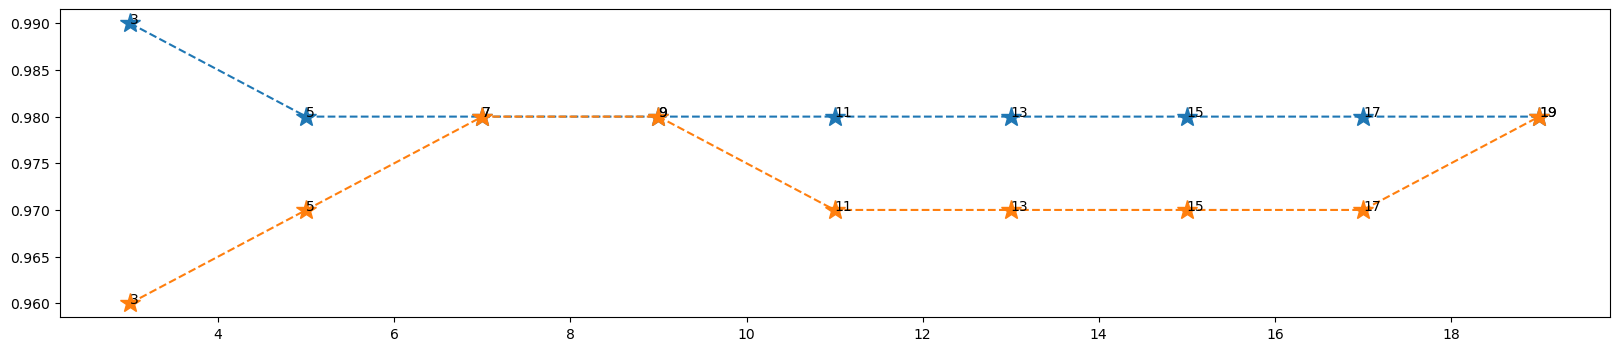

In [217]:
plt.figure(figsize=(20,4))
for x,y, in zip(n,tr):
    plt.text(x,y,str(x))
plt.plot(n,tr,"*--",markersize=15)
for x,y, in zip(n,te):
    plt.text(x,y,str(x))
plt.plot(n,te,"*--",markersize=15)